In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [120]:
df=pd.read_csv('Zoo.csv')

In [121]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [123]:
target=df['type']

In [124]:
features=df.drop(['animal name','type'],axis=1)

In [125]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [126]:
df.duplicated().sum()

0

In [127]:
num_columns=[i for i in df.columns if df[i].dtype!='O']
num_columns

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

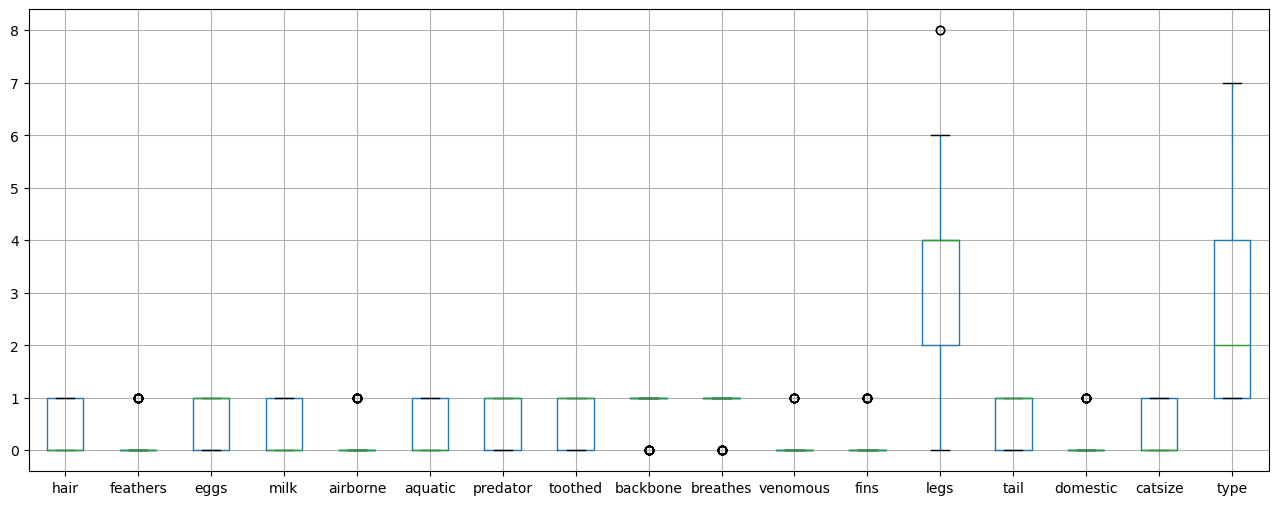

In [128]:
figure=plt.figure(figsize=(16,6))
df.boxplot(num_columns)
plt.show()

    

In [129]:
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


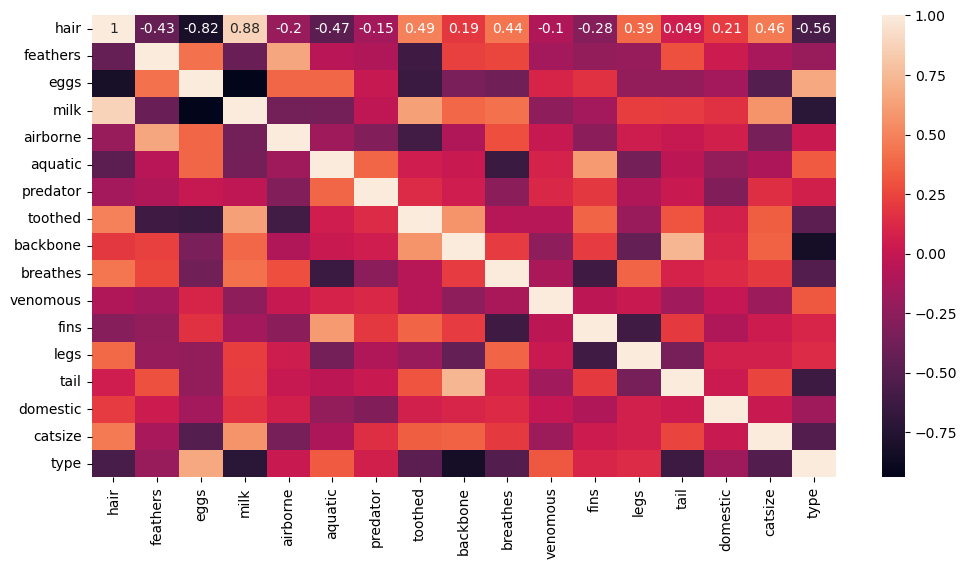

In [130]:
figure=plt.figure(figsize=(12,6))
sns.heatmap(df[num_columns].corr(),annot=True)
plt.show()

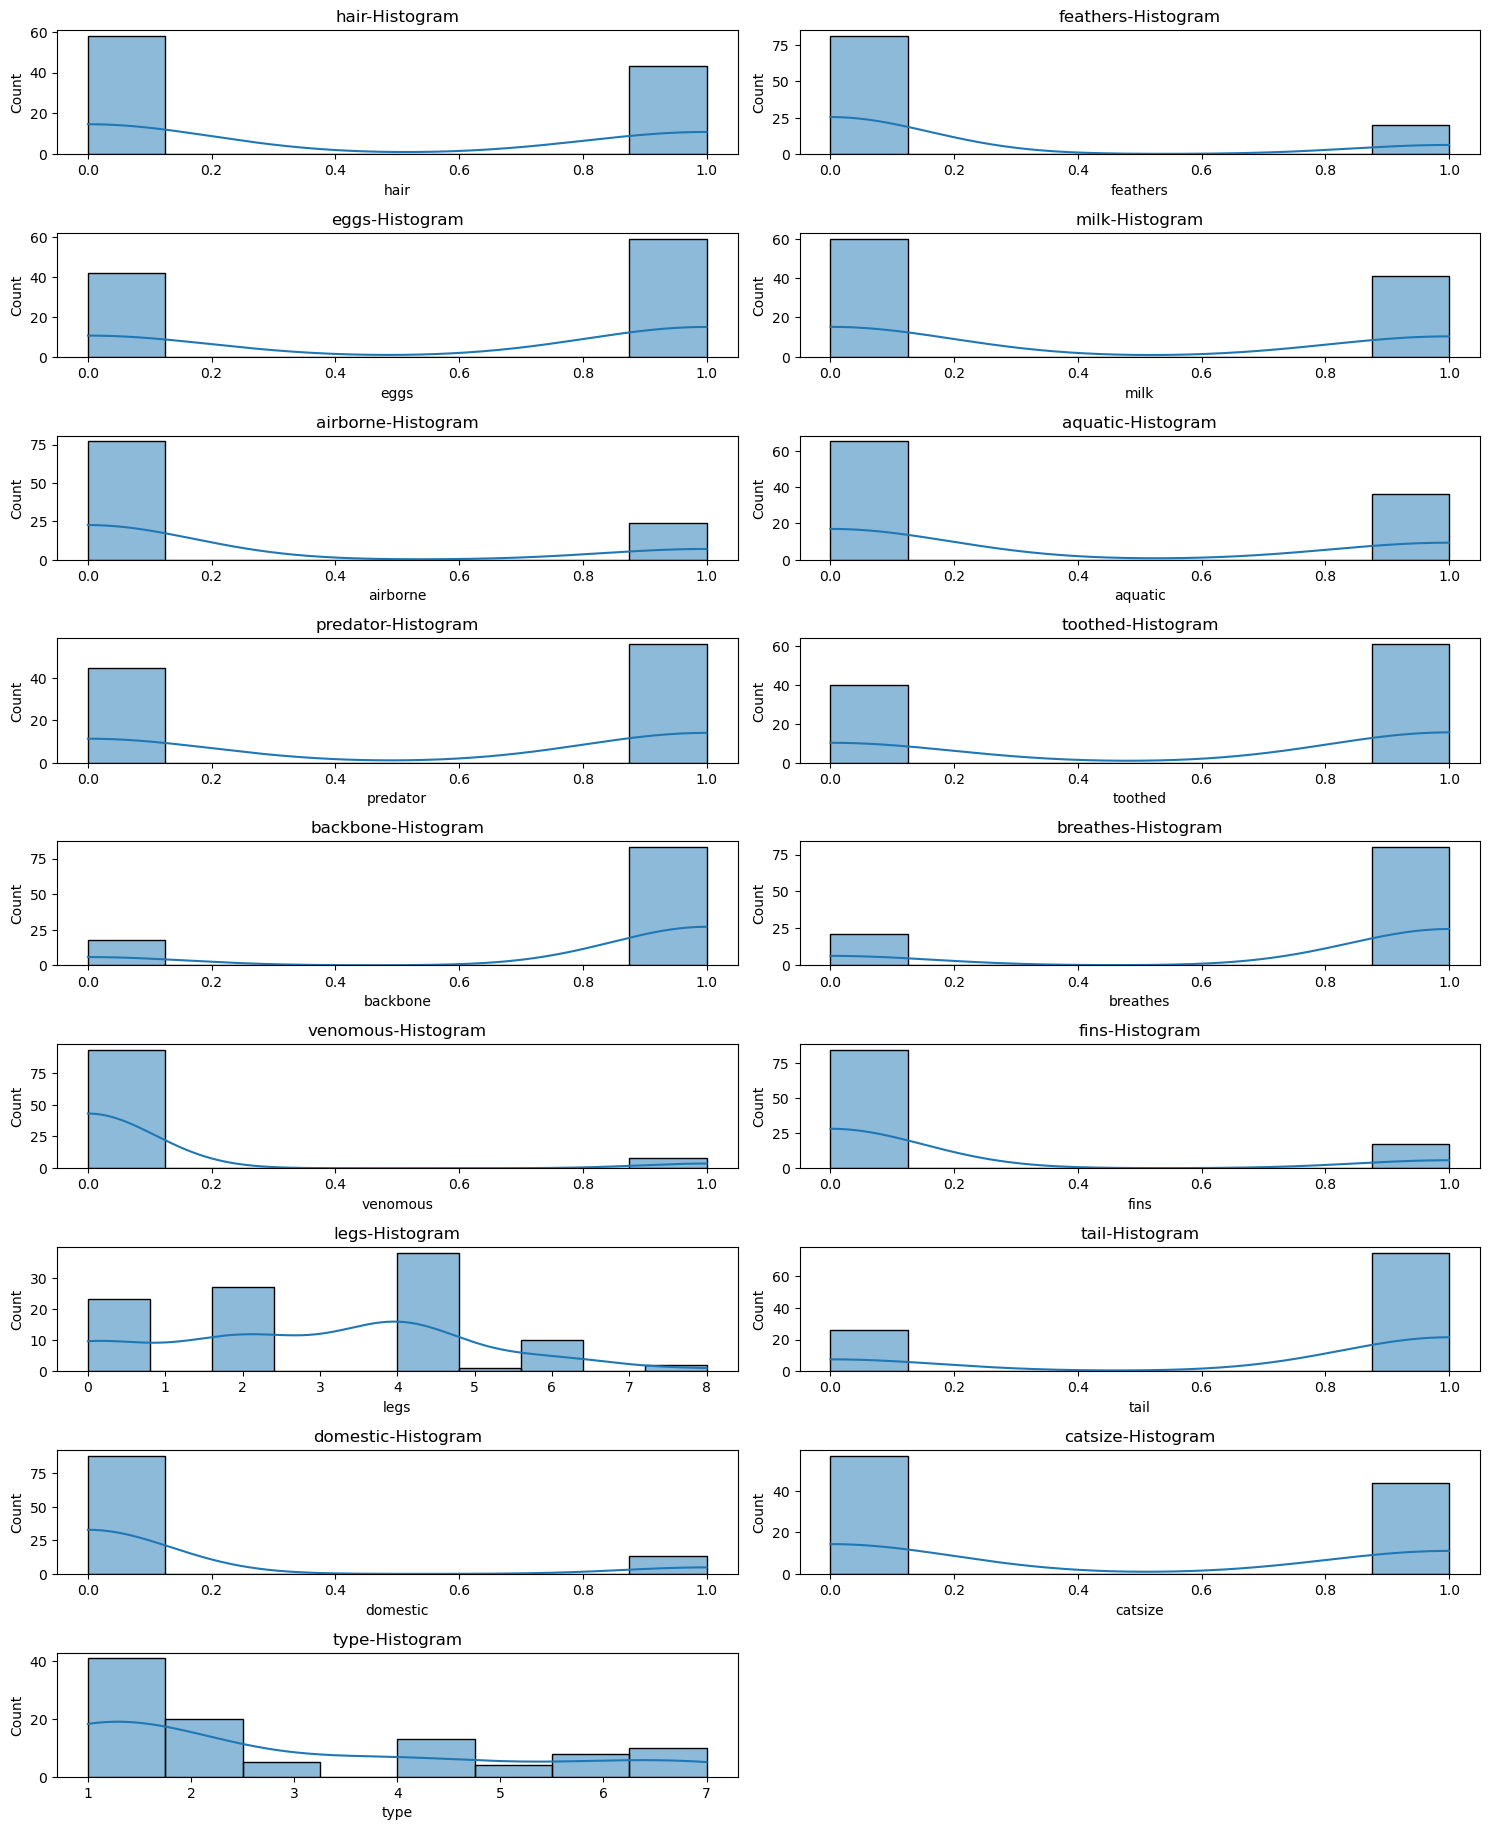

In [131]:
figure=plt.figure(figsize=(15,20))
for i,column in enumerate(df[num_columns]):
    plt.subplot(len(df.columns)//2+1,2,i+1)
    sns.histplot(df[column],kde=True)
    plt.title(f'{column}-Histogram')
plt.tight_layout()    
plt.show()    
    

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [133]:
stan_sca=StandardScaler()

In [134]:
features=stan_sca.fit_transform(features)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score,f1_score,precision_score,classification_report

In [136]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)

In [137]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(80, 16)
(21, 16)
(80,)
(21,)


In [138]:
knn=KNeighborsClassifier(n_neighbors=1)

In [139]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [140]:
y_pred=knn.predict(x_test)

In [141]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [142]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00         8\n           2       1.00      1.00      1.00         6\n           3       0.50      1.00      0.67         1\n           4       1.00      1.00      1.00         2\n           5       1.00      0.50      0.67         2\n           6       1.00      1.00      1.00         2\n\n    accuracy                           0.95        21\n   macro avg       0.92      0.92      0.89        21\nweighted avg       0.98      0.95      0.95        21\n'

## Grid Search

In [143]:
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [144]:
gridsearch=GridSearchCV(knn,params)

In [145]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [146]:
gridsearch.best_params_

{'n_neighbors': 1}

In [156]:
from sklearn.decomposition import PCA

In [172]:
knn = KNeighborsClassifier(n_neighbors=5)

In [173]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [174]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn.fit(X_train_pca, y_train)


KNeighborsClassifier()

In [175]:
h=0.2 #(x_max-x_min)/100
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [176]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

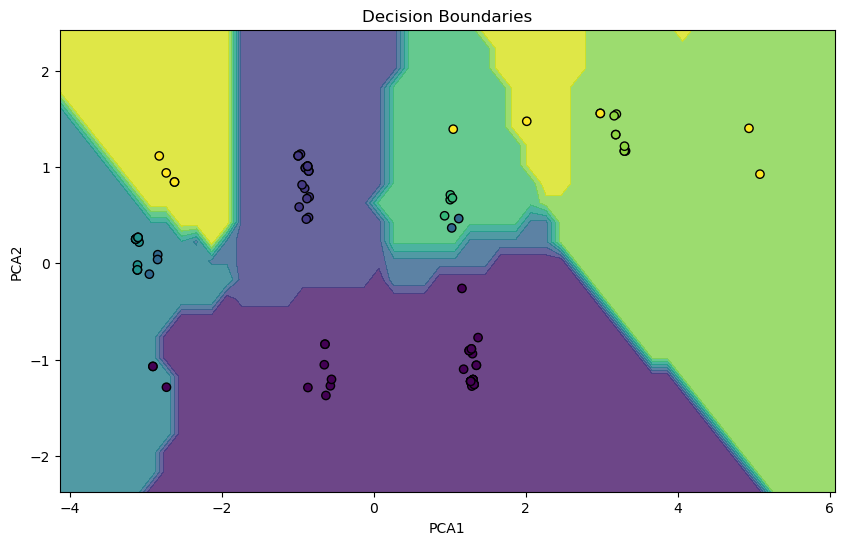

In [180]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Decision Boundaries')
plt.show()

##   What are the key hyperparameters in KNN?
   
   n_neighbors,
   metric,
   weights,
   algorithm,
   leaf_size.
   These hyperparameters affect the model's accuracy, speed, and ability to generalize.

##   What distance metrics can be used in KNN?
   
   Euclidean Distance,
   Manhattan Distance,
   Minkowski Distance,
   Cosine Similarity,
   Hamming Distance.